In [11]:
import numpy as np
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,BatchNormalization
import matplotlib.pyplot as plt

In [2]:
(train_images_orig, train_labels_orig), (test_images_orig, test_labels_orig) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
train_images = train_images_orig.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

In [4]:
test_images = test_images_orig.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

In [5]:
train_labels = to_categorical(train_labels_orig)
test_labels = to_categorical(test_labels_orig)

In [7]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 13, 13, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                        

In [9]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
history = model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 74s 43ms/step - loss: 0.1533 - accuracy: 0.9537 - val_loss: 0.0412 - val_accuracy: 0.9897
Epoch 2/10
1688/1688 [==============================] - 73s 43ms/step - loss: 0.0700 - accuracy: 0.9800 - val_loss: 0.0410 - val_accuracy: 0.9892
Epoch 3/10
1688/1688 [==============================] - 72s 43ms/step - loss: 0.0531 - accuracy: 0.9858 - val_loss: 0.0414 - val_accuracy: 0.9897
Epoch 4/10
1688/1688 [==============================] - 71s 42ms/step - loss: 0.0401 - accuracy: 0.9887 - val_loss: 0.0396 - val_accuracy: 0.9908
Epoch 5/10
1688/1688 [==============================] - 75s 44ms/step - loss: 0.0352 - accuracy: 0.9896 - val_loss: 0.0427 - val_accuracy: 0.9907
Epoch 6/10
1688/1688 [==============================] - 71s 42ms/step - loss: 0.0279 - accuracy: 0.9920 - val_loss: 0.0547 - val_accuracy: 0.9900
Epoch 7/10
1688/1688 [==============================] - 72s 43ms/step - loss: 0.0274 - accuracy: 0.9917 - val_loss: 0.0473 -

Text(0.5, 1.0, 'Training Accuracy Over Epochs')

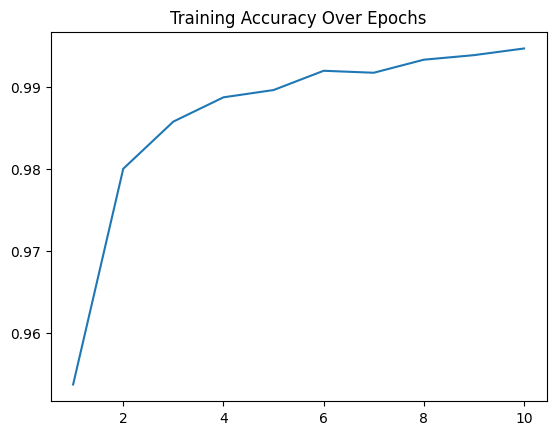

In [13]:
train_accuracy = history.history['accuracy']

plt.plot(range(1, len(train_accuracy) + 1), train_accuracy)
plt.title('Training Accuracy Over Epochs')

Text(0.5, 1.0, 'Validation Accuracy Over Epochs')

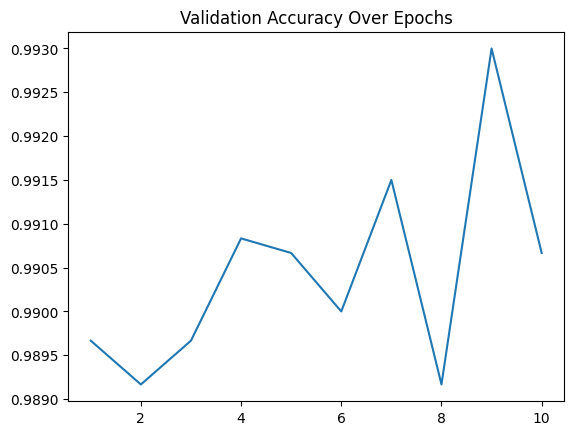

In [14]:
val_accuracy = history.history['val_accuracy']
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy)
plt.title('Validation Accuracy Over Epochs')